# Regression , Classification Problems 

## Orderwise 
- to predict : sales(TotPrice of order)[reg]


## Productwise 
- to predict : prodName[reg] , clientName[reg] , prodPrice[classif]


## Clientwise
- to predict : sales()[reg] 


## To do 
### 1. Vid 19 - EDA : Understanding your data 
### 2. Vid 20 - EDA : Univariate
### 3. Vid 21 - EDA : Multivariate 
### 4. Vid 22 - EDA : Pandas Profiler 
### 5. Vid 50- Vid : Simple Linear Regression
### 6. Vid 53- Vid : Multiple Linear Regression 
### 7. Vid 56- Vid : Gradient Descent 
### 8. Vid 60- Vid : Polynomial Regression 
### 9. Vid 62- Vid : Ridge Regression
### 10. Vid 66- Vid : Lasso Regression
### 11. Vid 68- Vid : ElasticNet Regression
### 12. Vid 69- Vid : Logistic Regression
### 13. Vid 77- Vid : Softmax Regression
### 14. Vid 80- Vid : Decision Tree
### 15. Vid 82- Vid : Regression Tree
### 16. Vid 85- Vid : Voting
### 17. Vid 88- Vid : Bagging
### 18. Vid 91- Vid : Random Forest
### 19. Vid 98- Vid : ADA Boosting
### 20. Vid 106- Vid : Gradient Boosting
### 21. Vid 108- Vid : Stacking, Blending Ensembles

In [3]:
import pandas as pd
import numpy as np

In [4]:
df_orderwise = pd.read_csv("../1_mockData/try1/orderwise.csv")
print(df_orderwise.shape)
df_productwise = pd.read_csv("../1_mockData/try1/productwise.csv")
print(df_productwise.shape)
df_clientwise = pd.read_csv("../1_mockData/try1/clientwise.csv")
print(df_clientwise.shape)

(18622, 12)
(59094, 13)
(18284, 7)


In [5]:
df_orderwise.head(5)

Unnamed: 0  OrderID ClientName  MonthNum  Hour  Minute  Day  \
0           0     1001    Client1         1    20      51    4   
1           1     1002    Client8         1    21       3    0   
2           2     1003    Client0         1    18      22    4   
3           3     1004    Client9         1    19      16    3   
4           4     1005    Client0         1    14      57    3   

                       Prods  CliAvgSenti  SpAvgSenti  QtyOrdered  Sales  
0         prod14,prod6,prod2          0.8         0.6           5   2400  
1        prod2,prod15,prod15          0.4         0.4          10   9500  
2          prod2,prod9,prod1          0.2         0.6          10   3200  
3  prod4,prod13,prod3,prod12          0.6         0.4          14   4800  
4         prod3,prod12,prod4          0.2         0.6          13   6300

In [6]:
df_productwise.sample(5)

Unnamed: 0 ProdName ClientName  MonthNum  OrderID  OrderQty  \
24985       24985    prod5    Client3         5     7312        20   
43739       43739   prod11    Client0         2     4216         9   
41847       41847    prod2    Client0         2     3619        21   
48679       48679    prod8    Client4        11    16780        12   
40542       40542    prod5    Client6         2     3209         9   

       OrderTotal  CliAvgSenti  SpAvgSenti  ProdPrice  Hour  Minute  Day  
24985       17100          0.8         0.0        900    15      40    0  
43739        6100          0.4         0.4        600    20      41    1  
41847       12800          0.6         0.4       3500    14       0    1  
48679        4800          0.8         0.4        200    22       3    4  
40542        3800          0.4         0.8        900    19       2    4

In [7]:
df_clientwise.sample(5)

Unnamed: 0 ClientName  MonthNum  Day                       Prods  \
16321       16321    Client8        11    2           prod3,prod1,prod8   
14212       14212    Client8         1    6  prod10,prod3,prod12,prod13   
5527         5527    Client1         8    5   prod15,prod1,prod1,prod15   
13219       13219    Client6         7    1                 prod1,prod5   
3270         3270    Client0        10    4          prod14,prod6,prod2   

       QtyOrdered  Sales  
16321          13   3200  
14212          19   7300  
5527           24  18600  
13219           3   2500  
3270           15   7500

# Orderwise csv 
- predict : tot price of order [reg]

In [31]:
import pandas as pd

In [32]:
df_orderwise.head(2)

Unnamed: 0  OrderID ClientName  MonthNum  Hour  Minute  Day  \
0           0     1001    Client1         1    20      51    4   
1           1     1002    Client8         1    21       3    0   

                 Prods  CliAvgSenti  SpAvgSenti  QtyOrdered  Sales  
0   prod14,prod6,prod2          0.8         0.6           5   2400  
1  prod2,prod15,prod15          0.4         0.4          10   9500

In [33]:
df_orderwise = df_orderwise.drop(['Unnamed: 0'],axis=1)
df_orderwise.head(2)

OrderID ClientName  MonthNum  Hour  Minute  Day                Prods  \
0     1001    Client1         1    20      51    4   prod14,prod6,prod2   
1     1002    Client8         1    21       3    0  prod2,prod15,prod15   

   CliAvgSenti  SpAvgSenti  QtyOrdered  Sales  
0          0.8         0.6           5   2400  
1          0.4         0.4          10   9500

In [34]:
df_orderwise.shape

(18622, 11)

In [35]:
df_orderwise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18622 entries, 0 to 18621
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   OrderID      18622 non-null  int64  
 1   ClientName   18622 non-null  object 
 2   MonthNum     18622 non-null  int64  
 3   Hour         18622 non-null  int64  
 4   Minute       18622 non-null  int64  
 5   Day          18622 non-null  int64  
 6   Prods        18622 non-null  object 
 7   CliAvgSenti  18622 non-null  float64
 8   SpAvgSenti   18622 non-null  float64
 9   QtyOrdered   18622 non-null  int64  
 10  Sales        18622 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 1.6+ MB


In [36]:
df_orderwise.describe()

OrderID      MonthNum          Hour        Minute           Day  \
count  18622.000000  18622.000000  18622.000000  18622.000000  18622.000000   
mean   10311.500000      6.759693     14.388734     29.533187      2.985608   
std     5375.852692      3.687250      5.456464     17.383361      1.997449   
min     1001.000000      1.000000      0.000000      0.000000      0.000000   
25%     5656.250000      3.000000     11.000000     14.250000      1.000000   
50%    10311.500000      7.000000     15.000000     29.000000      3.000000   
75%    14966.750000     10.000000     19.000000     45.000000      5.000000   
max    19622.000000     12.000000     23.000000     59.000000      6.000000   

        CliAvgSenti    SpAvgSenti    QtyOrdered         Sales  
count  18622.000000  18622.000000  18622.000000  18622.000000  
mean       0.500344      0.499334     14.053431   7881.967565  
std        0.223593      0.224886      5.973762   4183.126597  
min        0.000000      0.000000      2.000000    400.000000  
25%        0.400000      0.400000     10.000000   4600.000000  
50%        0.400000      0.600000     14.000000   7300.000000  
75%        0.600000      0.600000     18.000000  10600.000000  
max        1.000000      1.000000     34.000000  27200.000000

In [37]:
df_orderwise.isnull().sum()

OrderID        0
ClientName     0
MonthNum       0
Hour           0
Minute         0
Day            0
Prods          0
CliAvgSenti    0
SpAvgSenti     0
QtyOrdered     0
Sales          0
dtype: int64

In [38]:
df_orderwise.duplicated().sum()

0

In [39]:
df_orderwise.corr()

OrderID  MonthNum      Hour    Minute       Day  CliAvgSenti  \
OrderID      1.000000  0.993758 -0.009708 -0.003982 -0.004109    -0.008131   
MonthNum     0.993758  1.000000 -0.009813 -0.004063 -0.005260    -0.008140   
Hour        -0.009708 -0.009813  1.000000 -0.016734  0.022627     0.006233   
Minute      -0.003982 -0.004063 -0.016734  1.000000  0.005795     0.004925   
Day         -0.004109 -0.005260  0.022627  0.005795  1.000000     0.002608   
CliAvgSenti -0.008131 -0.008140  0.006233  0.004925  0.002608     1.000000   
SpAvgSenti  -0.011780 -0.013321 -0.001430  0.010079  0.008563     0.004682   
QtyOrdered   0.004635  0.003253 -0.005468 -0.012470 -0.005840    -0.002028   
Sales        0.007843  0.005980 -0.004783 -0.008606 -0.001894    -0.004776   

             SpAvgSenti  QtyOrdered     Sales  
OrderID       -0.011780    0.004635  0.007843  
MonthNum      -0.013321    0.003253  0.005980  
Hour          -0.001430   -0.005468 -0.004783  
Minute         0.010079   -0.012470 -0.008606  
Day            0.008563   -0.005840 -0.001894  
CliAvgSenti    0.004682   -0.002028 -0.004776  
SpAvgSenti     1.000000   -0.000417 -0.005438  
QtyOrdered    -0.000417    1.000000  0.696091  
Sales         -0.005438    0.696091  1.000000

## EDA

In [40]:
df_orderwise.head()

OrderID ClientName  MonthNum  Hour  Minute  Day                      Prods  \
0     1001    Client1         1    20      51    4         prod14,prod6,prod2   
1     1002    Client8         1    21       3    0        prod2,prod15,prod15   
2     1003    Client0         1    18      22    4          prod2,prod9,prod1   
3     1004    Client9         1    19      16    3  prod4,prod13,prod3,prod12   
4     1005    Client0         1    14      57    3         prod3,prod12,prod4   

   CliAvgSenti  SpAvgSenti  QtyOrdered  Sales  
0          0.8         0.6           5   2400  
1          0.4         0.4          10   9500  
2          0.2         0.6          10   3200  
3          0.6         0.4          14   4800  
4          0.2         0.6          13   6300

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


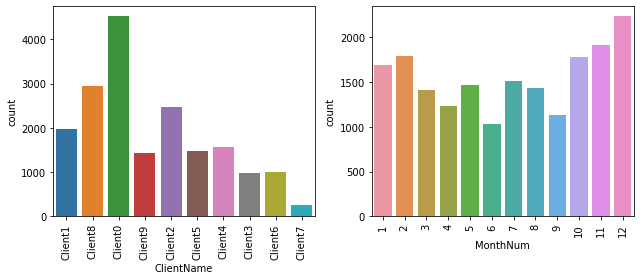

In [17]:
import seaborn as sns 
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [9.00, 4.0]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(1, 2)
sns.countplot(df_orderwise['ClientName'],ax=axes[0]).set_xticklabels(df_orderwise['ClientName'].unique(),rotation=90)
sns.countplot(df_orderwise['MonthNum'],ax=axes[1]).set_xticklabels(df_orderwise['MonthNum'].unique(),rotation=90)
plt.show()

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


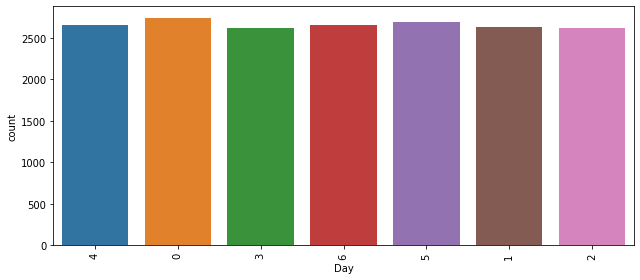

In [19]:
sns.countplot(df_orderwise['Day']).set_xticklabels(df_orderwise['Day'].unique(),rotation=90)
plt.show()

<AxesSubplot:ylabel='ClientName'>

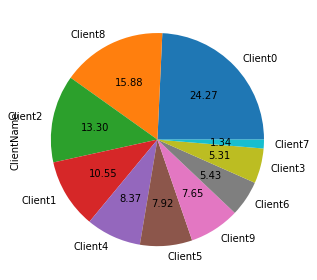

In [20]:
df_orderwise['ClientName'].value_counts().plot(kind='pie',autopct = '%.2f')

<AxesSubplot:ylabel='MonthNum'>

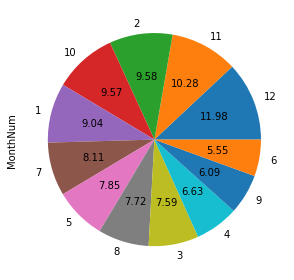

In [21]:
df_orderwise['MonthNum'].value_counts().plot(kind='pie',autopct = '%.2f')

<AxesSubplot:ylabel='Day'>

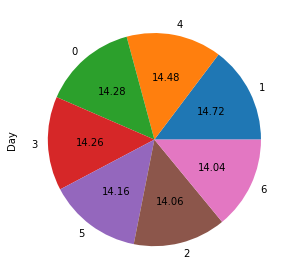

In [22]:
df_orderwise['Day'].value_counts().plot(kind='pie',autopct = '%.2f')

(array([ 422.,    0.,    0.,    0.,  244.,    0.,    0.,    0.,  142.,
           0.,    0.,    0.,    0.,   85.,    0.,    0.,    0.,   72.,
           0.,    0.,    0.,  134.,    0.,    0.,    0.,    0.,  240.,
           0.,    0.,    0.,  435.,    0.,    0.,    0.,  586.,    0.,
           0.,    0.,    0.,  873.,    0.,    0.,    0., 1060.,    0.,
           0.,    0., 1264.,    0.,    0.,    0.,    0., 1209.,    0.,
           0.,    0., 1187.,    0.,    0.,    0., 1164.,    0.,    0.,
           0.,    0., 1023.,    0.,    0.,    0., 1007.,    0.,    0.,
           0., 1149.,    0.,    0.,    0.,    0., 1243.,    0.,    0.,
           0., 1241.,    0.,    0.,    0., 1278.,    0.,    0.,    0.,
           0., 1088.,    0.,    0.,    0.,  862.,    0.,    0.,    0.,
         614.]),
 array([ 0.  ,  0.23,  0.46,  0.69,  0.92,  1.15,  1.38,  1.61,  1.84,
         2.07,  2.3 ,  2.53,  2.76,  2.99,  3.22,  3.45,  3.68,  3.91,
         4.14,  4.37,  4.6 ,  4.83,  5.06,  5.29,  5.52,  5.

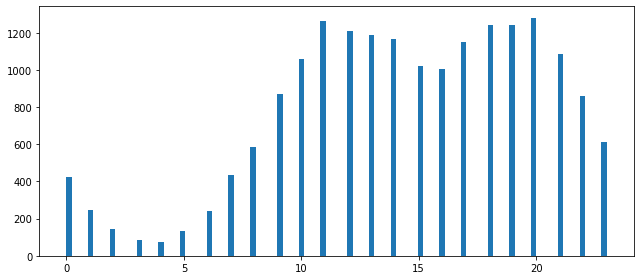

In [24]:
import matplotlib.pyplot as plt
plt.hist(df_orderwise['Hour'],bins=100)

(array([ 591., 2854., 5903., 5746., 2951.,  577.]),
 array([0.        , 0.16666667, 0.33333333, 0.5       , 0.66666667,
        0.83333333, 1.        ]),
 <BarContainer object of 6 artists>)

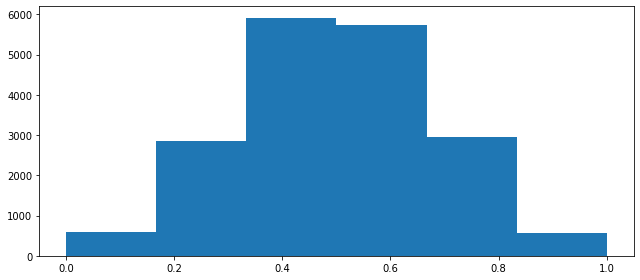

In [28]:
plt.hist(df_orderwise['CliAvgSenti'],bins=6)

(array([ 627., 2908., 5771., 5781., 2975.,  560.]),
 array([0.        , 0.16666667, 0.33333333, 0.5       , 0.66666667,
        0.83333333, 1.        ]),
 <BarContainer object of 6 artists>)

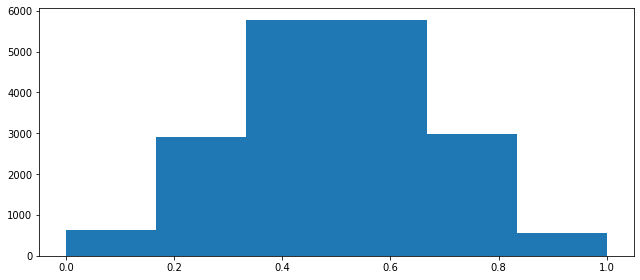

In [37]:
plt.hist(df_orderwise['SpAvgSenti'],bins=6)

(array([2.280e+02, 0.000e+00, 0.000e+00, 3.150e+02, 0.000e+00, 0.000e+00,
        3.650e+02, 0.000e+00, 0.000e+00, 4.980e+02, 0.000e+00, 0.000e+00,
        5.600e+02, 0.000e+00, 0.000e+00, 6.910e+02, 0.000e+00, 0.000e+00,
        7.780e+02, 0.000e+00, 0.000e+00, 9.370e+02, 0.000e+00, 0.000e+00,
        0.000e+00, 1.006e+03, 0.000e+00, 0.000e+00, 1.160e+03, 0.000e+00,
        0.000e+00, 1.260e+03, 0.000e+00, 0.000e+00, 1.255e+03, 0.000e+00,
        0.000e+00, 1.198e+03, 0.000e+00, 0.000e+00, 1.124e+03, 0.000e+00,
        0.000e+00, 1.092e+03, 0.000e+00, 0.000e+00, 9.550e+02, 0.000e+00,
        0.000e+00, 0.000e+00, 9.160e+02, 0.000e+00, 0.000e+00, 8.460e+02,
        0.000e+00, 0.000e+00, 6.710e+02, 0.000e+00, 0.000e+00, 6.730e+02,
        0.000e+00, 0.000e+00, 5.110e+02, 0.000e+00, 0.000e+00, 3.810e+02,
        0.000e+00, 0.000e+00, 2.830e+02, 0.000e+00, 0.000e+00, 2.450e+02,
        0.000e+00, 0.000e+00, 0.000e+00, 1.790e+02, 0.000e+00, 0.000e+00,
        1.520e+02, 0.000e+00, 0.000e+0

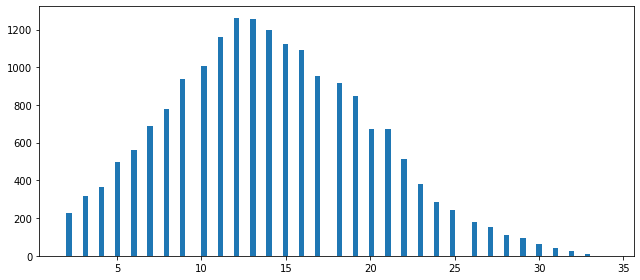

In [35]:
plt.hist(df_orderwise['QtyOrdered'],bins=100)

(array([  2.,   2.,   0.,   7.,   0.,  12.,   0.,  11.,   0.,  17.,   0.,
         25.,   0.,  24.,  57.,   0.,  47.,   0.,  47.,   0.,  66.,   0.,
         98.,   0., 141.,   0., 130., 110.,   0., 159.,   0.,  89.,   0.,
         93.,   0., 125.,   0.,  98.,   0., 139.,   0., 139., 166.,   0.,
        150.,   0., 116.,   0., 164.,   0., 116.,   0., 145.,   0., 126.,
        177.,   0., 134.,   0., 136.,   0., 181.,   0., 152.,   0., 169.,
          0., 210.,   0., 143., 161.,   0., 152.,   0., 133.,   0., 146.,
          0., 168.,   0., 187.,   0., 168., 164.,   0., 232.,   0., 159.,
          0., 147.,   0., 140.,   0., 173.,   0., 182.,   0., 165., 185.,
          0., 152.,   0., 175.,   0., 221.,   0., 179.,   0., 152.,   0.,
        153., 163.,   0., 141.,   0., 152.,   0., 192.,   0., 172.,   0.,
        174.,   0., 208.,   0., 154., 170.,   0., 184.,   0., 137.,   0.,
        144.,   0., 164.,   0., 166.,   0., 161., 175.,   0., 221.,   0.,
        146.,   0., 157.,   0., 144., 

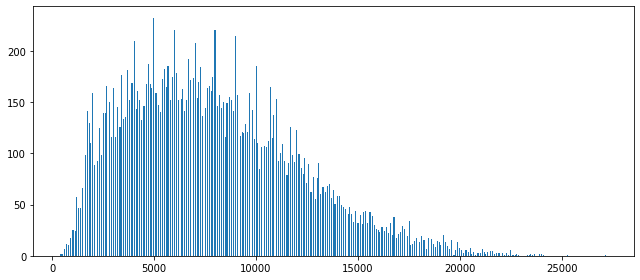

In [40]:
plt.hist(df_orderwise['Sales'],bins=500)

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Hour', ylabel='Density'>

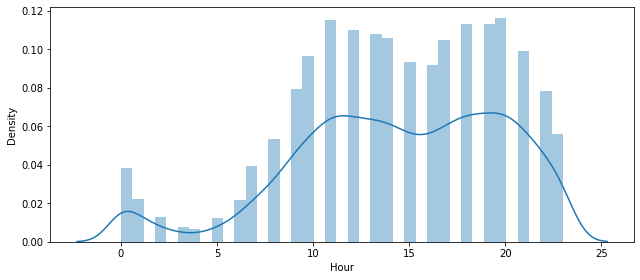

In [42]:
sns.distplot(df_orderwise['Hour'])

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CliAvgSenti', ylabel='Density'>

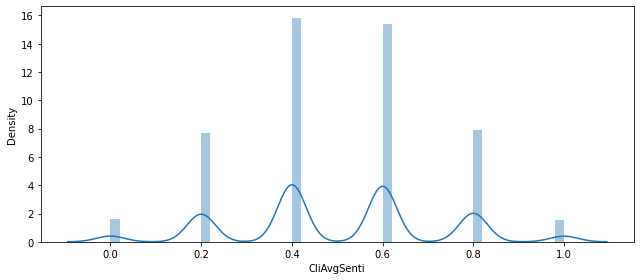

In [44]:
sns.distplot(df_orderwise['CliAvgSenti'])

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SpAvgSenti', ylabel='Density'>

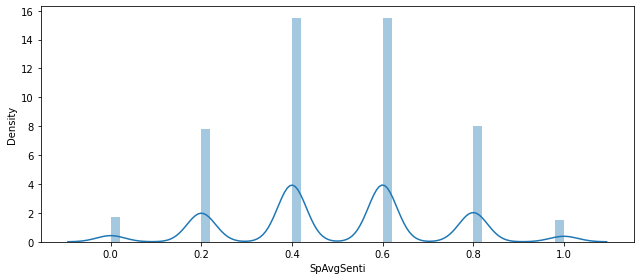

In [45]:
sns.distplot(df_orderwise['SpAvgSenti'])

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='QtyOrdered', ylabel='Density'>

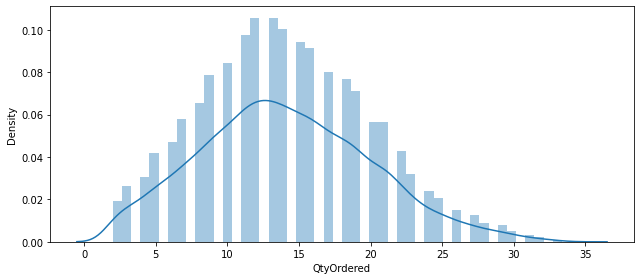

In [46]:
sns.distplot(df_orderwise['QtyOrdered'])

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sales', ylabel='Density'>

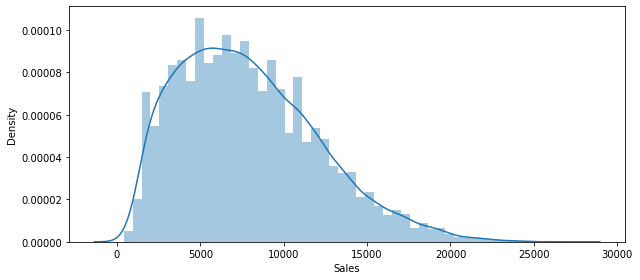

In [47]:
sns.distplot(df_orderwise['Sales'])

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Hour'>

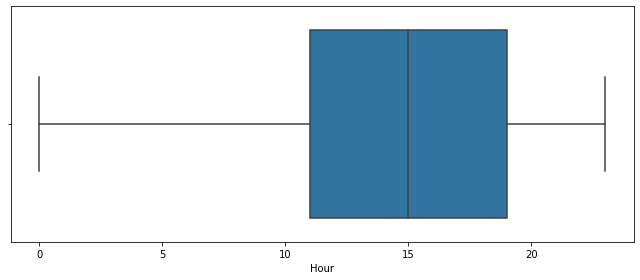

In [48]:
sns.boxplot(df_orderwise['Hour'])

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CliAvgSenti'>

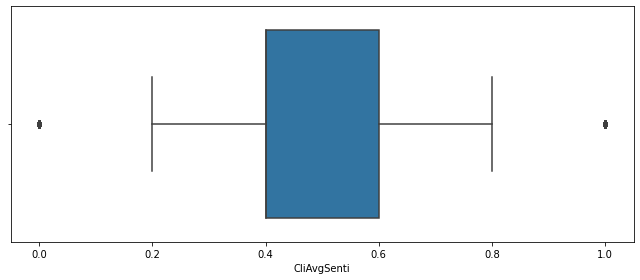

In [51]:
sns.boxplot(df_orderwise['CliAvgSenti'])

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SpAvgSenti'>

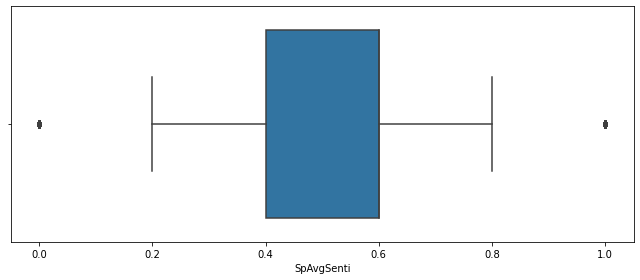

In [52]:
sns.boxplot(df_orderwise['SpAvgSenti'])

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='QtyOrdered'>

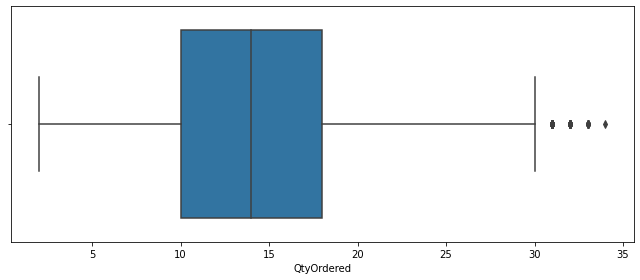

In [49]:
sns.boxplot(df_orderwise['QtyOrdered'])

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sales'>

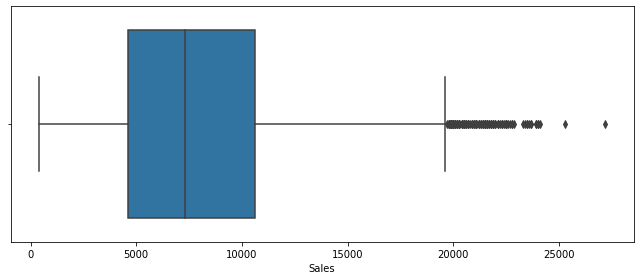

In [50]:
sns.boxplot(df_orderwise['Sales'])

In [53]:
import pandas as pd 
import seaborn as sns

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sales', ylabel='QtyOrdered'>

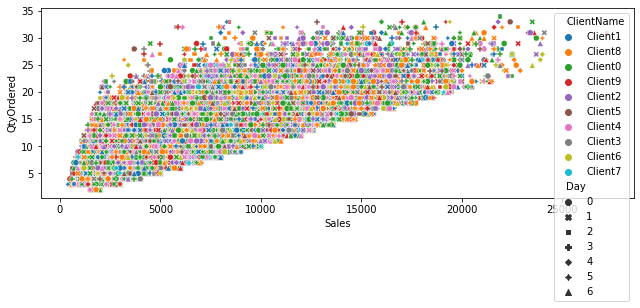

In [55]:
sns.scatterplot(df_orderwise['Sales'],df_orderwise['QtyOrdered'],hue=df_orderwise['ClientName'],style=df_orderwise['Day'])

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sales', ylabel='Hour'>

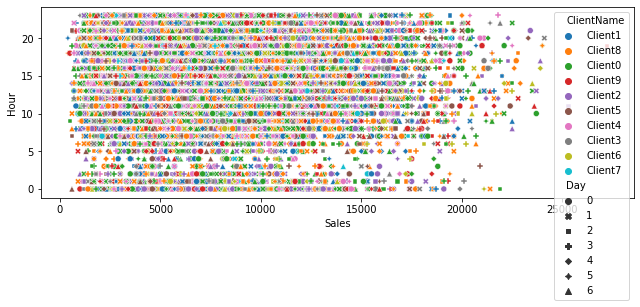

In [56]:
sns.scatterplot(df_orderwise['Sales'],df_orderwise['Hour'],hue=df_orderwise['ClientName'],style=df_orderwise['Day'])

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ClientName', ylabel='Sales'>

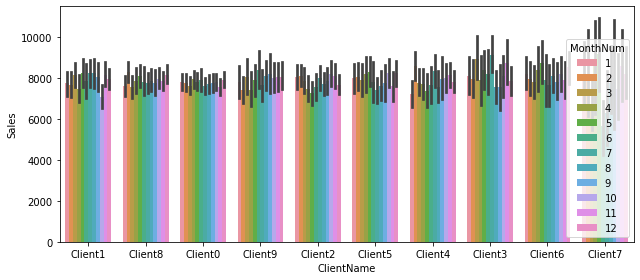

In [59]:
sns.barplot(df_orderwise['ClientName'],df_orderwise['Sales'],hue=df_orderwise['MonthNum'])


/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ClientName', ylabel='Sales'>

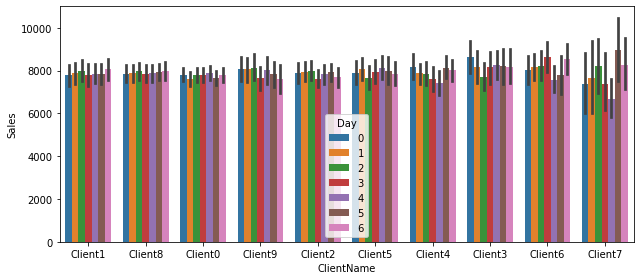

In [60]:
sns.barplot(df_orderwise['ClientName'],df_orderwise['Sales'],hue=df_orderwise['Day'])


/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ClientName', ylabel='Sales'>

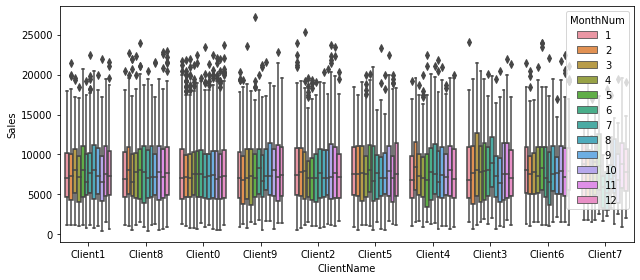

In [61]:
sns.boxplot(df_orderwise['ClientName'], df_orderwise['Sales'],hue=df_orderwise['MonthNum'])

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ClientName', ylabel='Sales'>

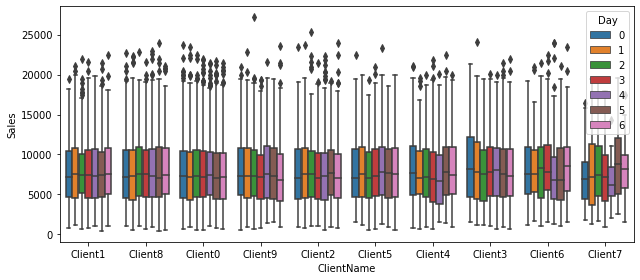

In [62]:
sns.boxplot(df_orderwise['ClientName'], df_orderwise['Sales'],hue=df_orderwise['Day'])

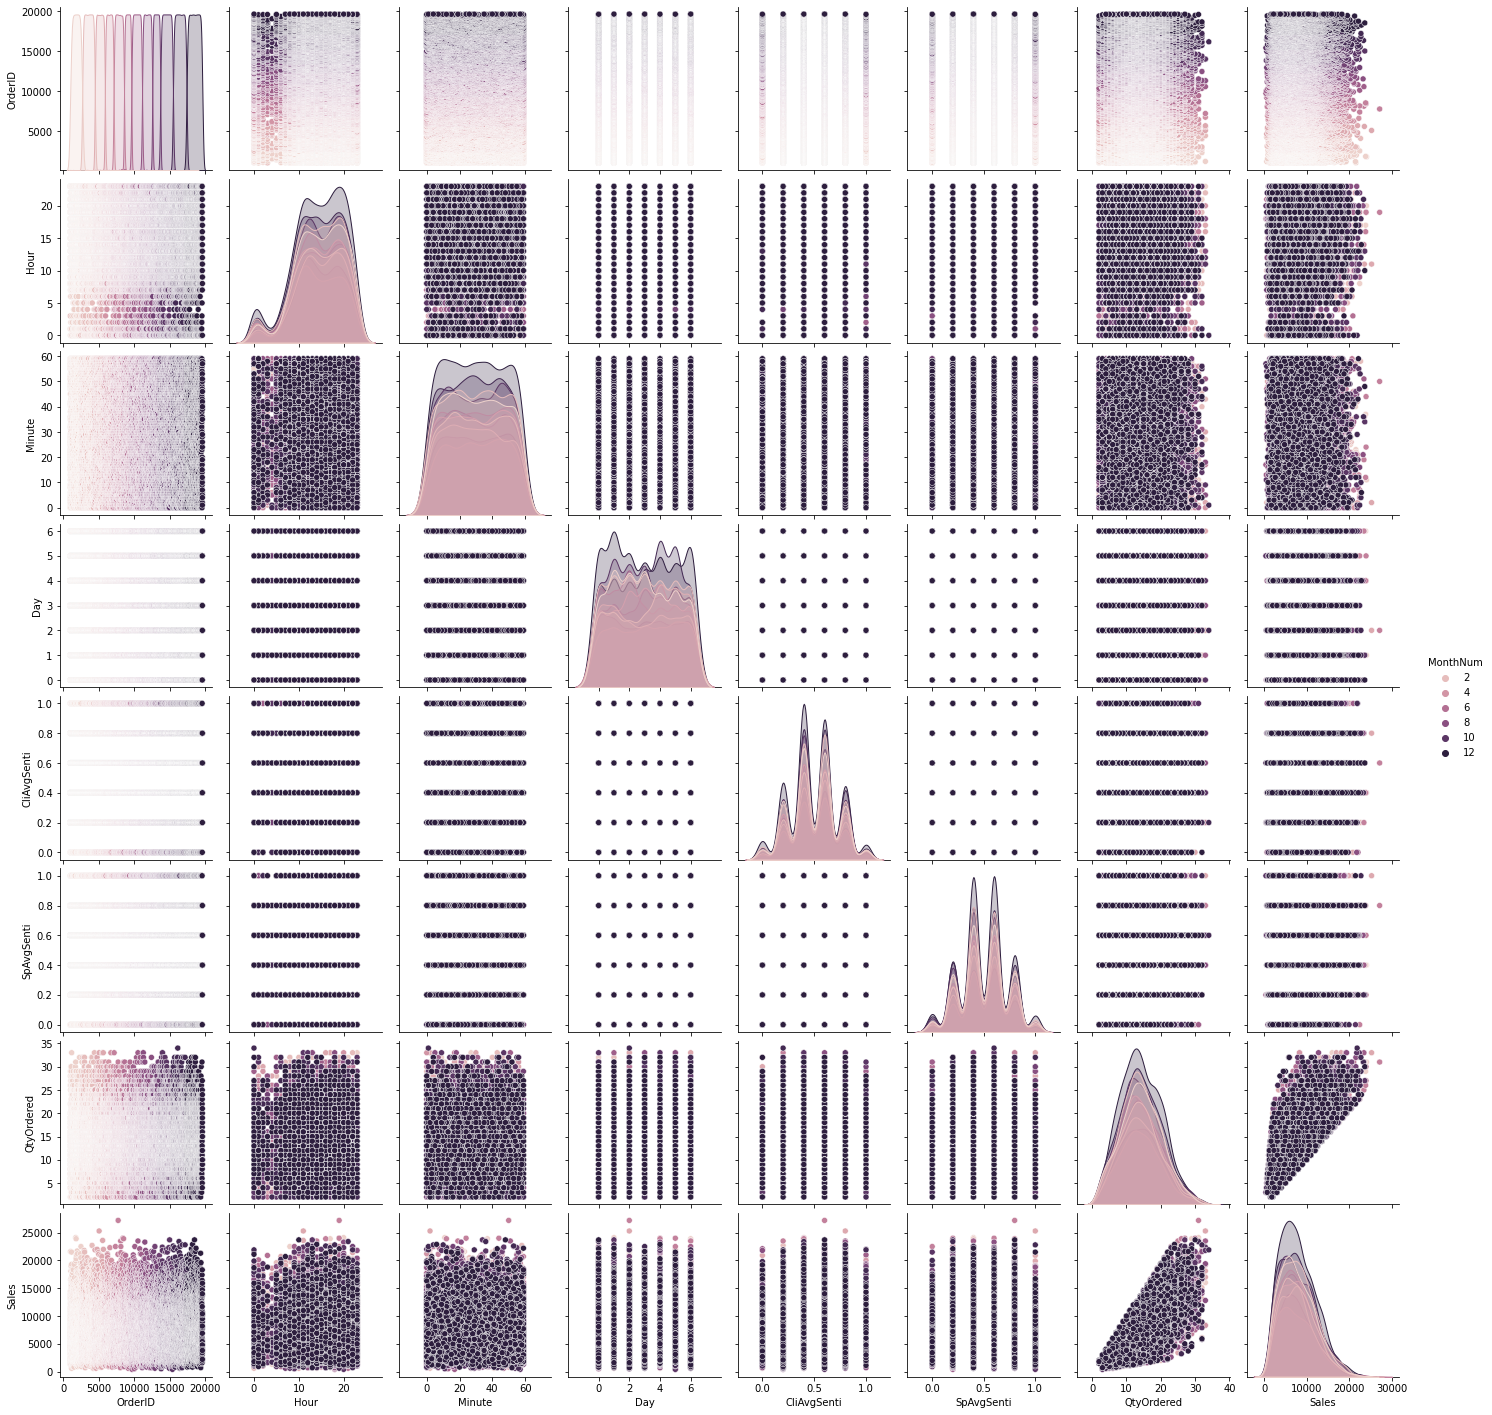

In [64]:
sns.pairplot(df_orderwise, hue="MonthNum")

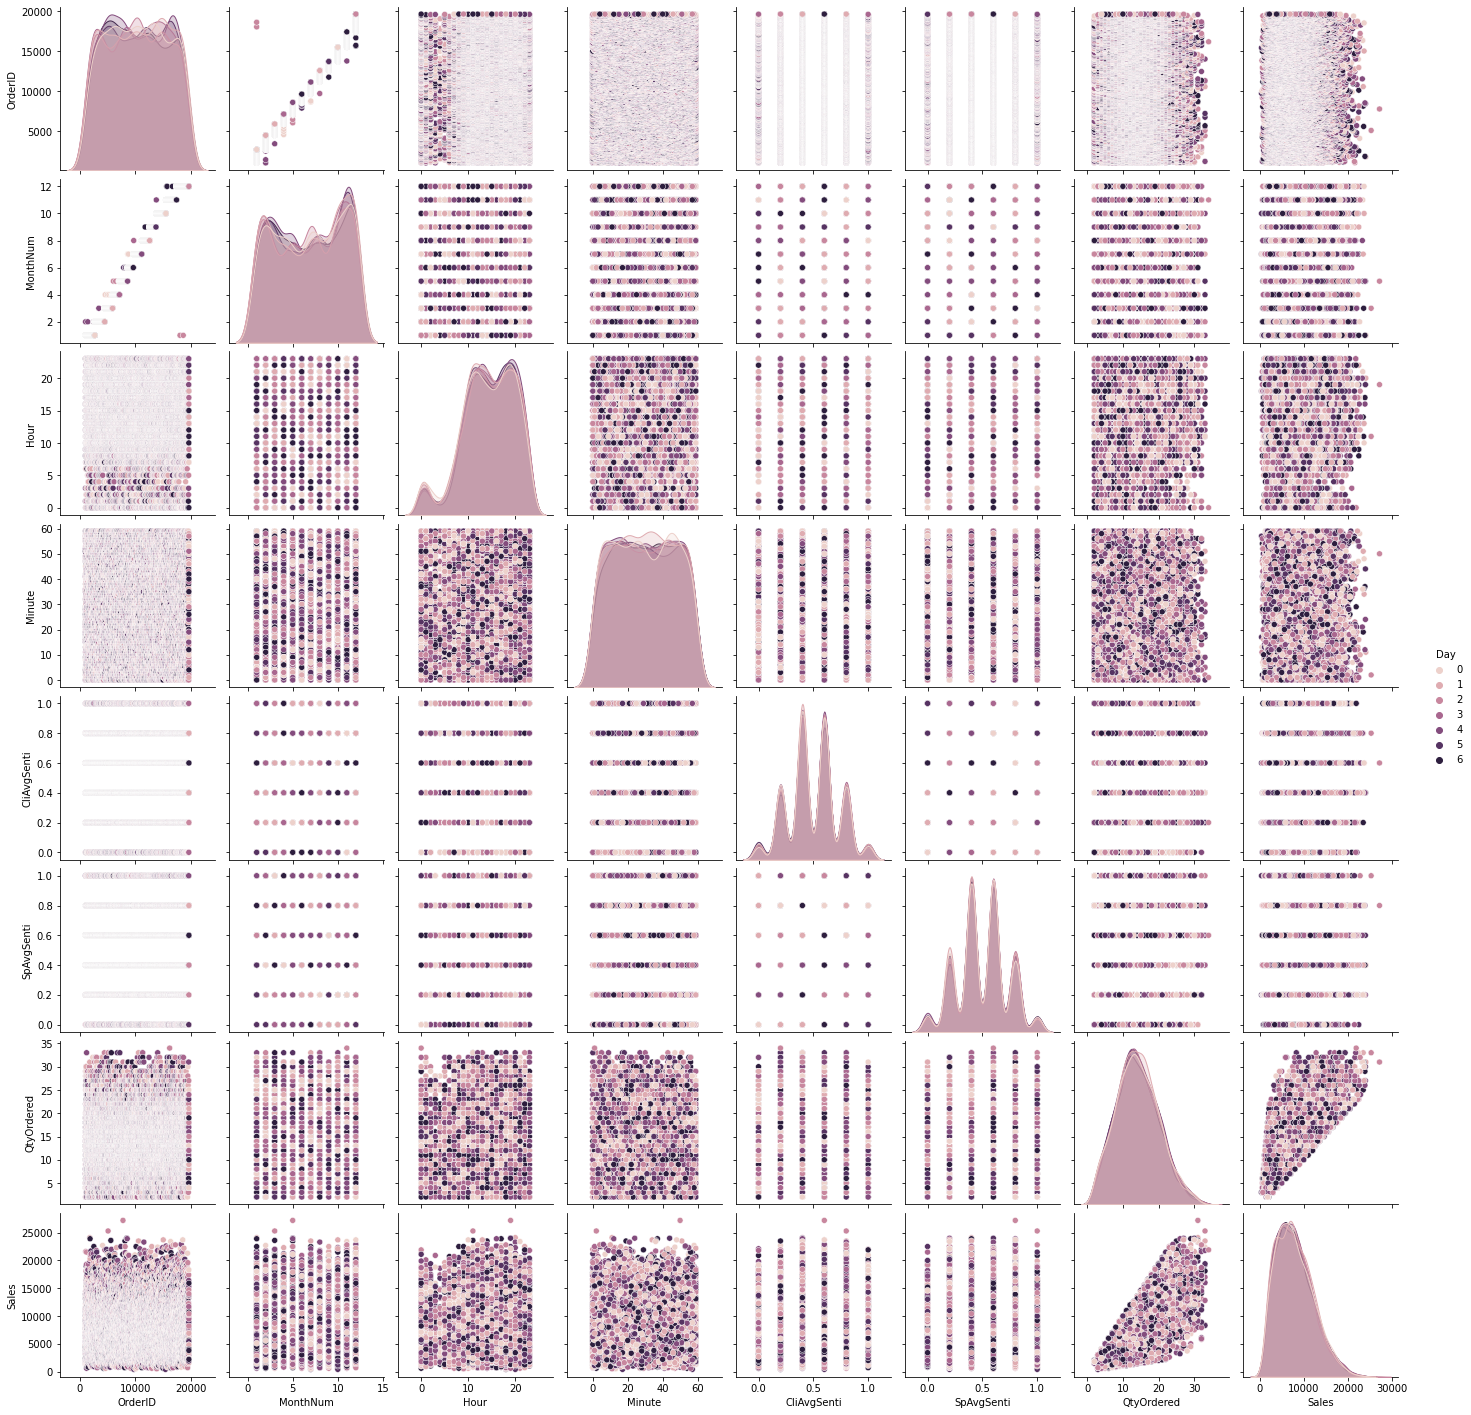

In [65]:
sns.pairplot(df_orderwise, hue="Day")

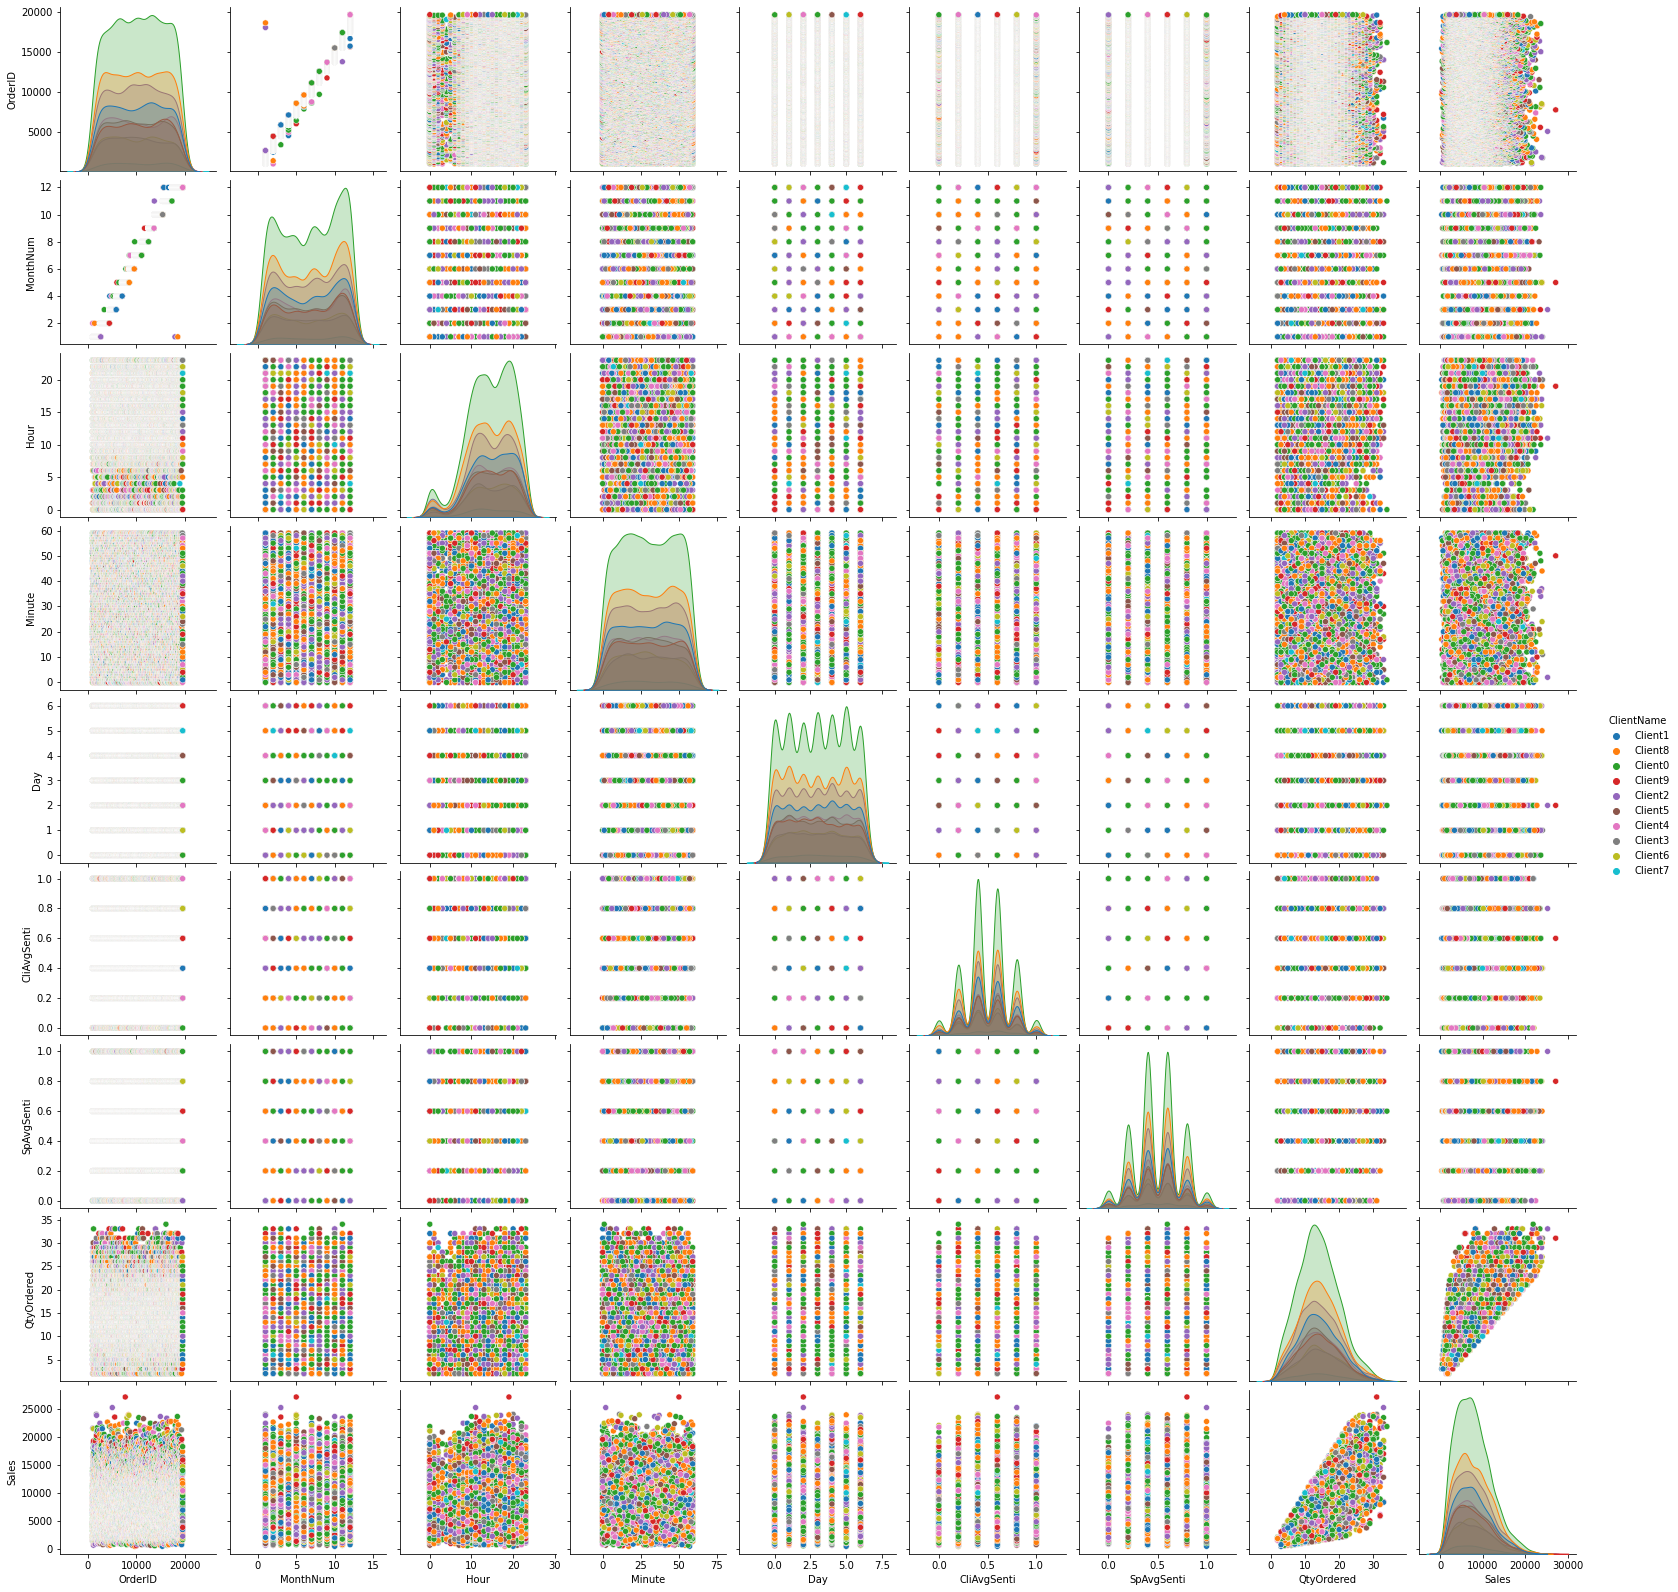

In [66]:
sns.pairplot(df_orderwise, hue="ClientName")

In [69]:
df_orderwise.corr()

OrderID  MonthNum      Hour    Minute       Day  CliAvgSenti  \
OrderID      1.000000  0.993758 -0.009708 -0.003982 -0.004109    -0.008131   
MonthNum     0.993758  1.000000 -0.009813 -0.004063 -0.005260    -0.008140   
Hour        -0.009708 -0.009813  1.000000 -0.016734  0.022627     0.006233   
Minute      -0.003982 -0.004063 -0.016734  1.000000  0.005795     0.004925   
Day         -0.004109 -0.005260  0.022627  0.005795  1.000000     0.002608   
CliAvgSenti -0.008131 -0.008140  0.006233  0.004925  0.002608     1.000000   
SpAvgSenti  -0.011780 -0.013321 -0.001430  0.010079  0.008563     0.004682   
QtyOrdered   0.004635  0.003253 -0.005468 -0.012470 -0.005840    -0.002028   
Sales        0.007843  0.005980 -0.004783 -0.008606 -0.001894    -0.004776   

             SpAvgSenti  QtyOrdered     Sales  
OrderID       -0.011780    0.004635  0.007843  
MonthNum      -0.013321    0.003253  0.005980  
Hour          -0.001430   -0.005468 -0.004783  
Minute         0.010079   -0.012470 -0.008606  
Day            0.008563   -0.005840 -0.001894  
CliAvgSenti    0.004682   -0.002028 -0.004776  
SpAvgSenti     1.000000   -0.000417 -0.005438  
QtyOrdered    -0.000417    1.000000  0.696091  
Sales         -0.005438    0.696091  1.000000

In [45]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_orderwise.ClientName = le.fit_transform(df_orderwise.ClientName)
df_orderwise.Prods = le.fit_transform(df_orderwise.Prods)

In [46]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_orderwise[['Prods']] = scaler.fit_transform(df_orderwise[['Prods']])


In [47]:
df_orderwise.head(2)

OrderID  ClientName  MonthNum  Hour  Minute  Day     Prods  CliAvgSenti  \
0     1001           1         1    20      51    4  0.439985          0.8   
1     1002           8         1    21       3    0  0.641184          0.4   

   SpAvgSenti  QtyOrdered  Sales  
0         0.6           5   2400  
1         0.4          10   9500

## Multiple Linear Regression

In [48]:
import pandas as pd
import numpy as np

import plotly.express as px
import plotly.graph_objects as go

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [49]:
X = df_orderwise[['ClientName','Prods','MonthNum','Hour','Minute','Day','CliAvgSenti','SpAvgSenti','QtyOrdered']]
y = df_orderwise[['Sales']]

In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=3)

In [68]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(X_train,y_train)
y_pred = mlr.predict(X_test)

In [69]:
print("MAE",mean_absolute_error(y_test,y_pred))
print("MSE",mean_squared_error(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))
print("R2Score",r2_score(y_test,y_pred))

MAE 2407.717570726364
MSE 9108657.545227828
RMSE 3018.0552588095247
R2Score 0.488790340521451


## Stochastic Gradient Descent

In [53]:
from sklearn.linear_model import SGDRegressor
reg = SGDRegressor(max_iter=100,learning_rate='constant',eta0=0.01)
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [54]:
print("MAE",mean_absolute_error(y_test,y_pred))
print("MSE",mean_squared_error(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))
print("R2Score",r2_score(y_test,y_pred))

MAE 5938450639952.146
MSE 5.120431117046639e+25
RMSE 7155718773852.588
R2Score -2.8737646955452713e+18


## Mini Batch GD

In [55]:
import random
sgd = SGDRegressor(learning_rate='constant',eta0=0.25)
batch_size = 35 

for i in range(100):
    idx = random.sample(range(X_train.shape[0]),batch_size)
    sgd.partial_fit(X_train.iloc[idx],y_train.iloc[idx])
y_pred = sgd.predict(X_test)

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when 

In [56]:
print("MAE",mean_absolute_error(y_test,y_pred))
print("MSE",mean_squared_error(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))
print("R2Score",r2_score(y_test,y_pred))

MAE 219635861870286.03
MSE 6.6588807260185375e+28
RMSE 258048071607182.1
R2Score -3.7371963228979494e+21


## Polynomial Regression

In [57]:
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.pipeline import Pipeline

In [58]:
poly = PolynomialFeatures(degree=2,include_bias=True) # bias is b0
X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

In [59]:
lr = LinearRegression()
lr.fit(X_train_trans,y_train)
y_pred = lr.predict(X_test_trans)

In [60]:
print("MAE",mean_absolute_error(y_test,y_pred))
print("MSE",mean_squared_error(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))
print("R2Score",r2_score(y_test,y_pred))

MAE 2411.7886299222396
MSE 9134266.6595655
RMSE 3022.2949325910436
R2Score 0.4873530676241986


## Ridge Regression

In [61]:
from sklearn.linear_model import Ridge
R = Ridge(alpha = 0.0001)
R.fit(X_train,y_train)
y_pred1 = R.predict(X_test)
print("MAE",mean_absolute_error(y_test,y_pred1))
print("MSE",mean_squared_error(y_test,y_pred1))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred1)))
print("R2Score",r2_score(y_test,y_pred1))

MAE 2407.717571095235
MSE 9108657.546688527
RMSE 3018.055259051518
R2Score 0.48879034043947134


## Lasso Regression

In [62]:
from sklearn.linear_model import Lasso 
L = Lasso(alpha = 0.0001)
L.fit(X_train,y_train)
y_pred1 = L.predict(X_test)
print("MAE",mean_absolute_error(y_test,y_pred1))
print("MSE",mean_squared_error(y_test,y_pred1))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred1)))
print("R2Score",r2_score(y_test,y_pred1))

MAE 2407.7175951831478
MSE 9108657.634509651
RMSE 3018.0552736008085
R2Score 0.48879033551064344


## ElasticNet Regression

In [64]:
from sklearn.linear_model import ElasticNet
EL = ElasticNet(alpha = 0.005, l1_ratio = 0.50)
EL.fit(X_train,y_train)
y_pred1 = EL.predict(X_test)
print("MAE",mean_absolute_error(y_test,y_pred1))
print("MSE",mean_squared_error(y_test,y_pred1))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred1)))
print("R2Score",r2_score(y_test,y_pred1))

MAE 2407.85149748927
MSE 9109198.681784986
RMSE 3018.144907353685
R2Score 0.48875997004877225


## Logistic Regression

In [65]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression()
lor.fit(X_train,y_train)
y_pred1 = lor.predict(X_test)
print("MAE",mean_absolute_error(y_test,y_pred1))
print("MSE",mean_squared_error(y_test,y_pred1))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred1)))
print("R2Score",r2_score(y_test,y_pred1))

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MAE 3005.2348993288592
MSE 15040292.617449664
RMSE 3878.18161223139
R2Score 0.15588627311469905


/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Decision Tree Regression

In [66]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
rt = DecisionTreeRegressor(criterion = 'squared_error', max_depth = 5)
rt.fit(X_train,y_train)
y_pred1 = rt.predict(X_test)
print("MAE",mean_absolute_error(y_test,y_pred1))
print("MSE",mean_squared_error(y_test,y_pred1))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred1)))
print("R2Score",r2_score(y_test,y_pred1))

MAE 2364.5618776763245
MSE 9023202.499941686
RMSE 3003.8645941423
R2Score 0.49358637598381605


In [67]:
#hyperparam tuning 
param_grid = {
    'max_depth':[2,4,8,10,None],
    'criterion':['mse','mae'],
    'max_features':[0.25,0.5,1.0],
    'min_samples_split':[0.25,0.5,1.0]
}
reg = GridSearchCV(DecisionTreeRegressor(),param_grid=param_grid)
reg.fit(X_train,y_train)

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.wa

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.wa

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.wa

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.wa

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.wa

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.wa

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.wa

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warning

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warning

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warning

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warning

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warning

KeyboardInterrupt: 

In [ ]:
print(reg.best_score_)
print(reg.best_params_)

In [ ]:
#feature importance 
for importance,name in sorted(zip(rt.feature_importances_,X_train.columns),reverse=True):
    print(name,importance)

## Voting Regressor

In [74]:
from sklearn.model_selection import cross_val_score
estimators = [('mlr',mlr),('poly',lr),('R',R),('L',L),('EL',EL),('rt',rt)]
for estimator in estimators :
    scores = cross_val_score(estimator[1],X,y,scoring='r2',cv=10)
    print(estimator[0],np.round(np.mean(scores),2))

mlr 0.48
poly 0.48
R 0.48
L 0.48
EL 0.48
rt 0.49


In [75]:
from sklearn.ensemble import VotingRegressor
vr = VotingRegressor(estimators)
scores = cross_val_score(vr,X,y,scoring='r2',cv=10)
print('voting regressor',np.round(np.mean(scores),2))

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/ensemble/_voting.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/ensemble/_voting.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/ensemble/_voting.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/ensemble/_voting.py:528: DataConversionWarning: A column-vector y was passed when 

voting regressor 0.49


## Bagging Regressor

In [73]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingRegressor
bag_regressor = BaggingRegressor(random_state = 1)
bag_regressor.fit(X_train,y_train)

y_pred1 = bag_regressor.predict(X_test)
print("MAE",mean_absolute_error(y_test,y_pred1))
print("MSE",mean_squared_error(y_test,y_pred1))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred1)))
print("R2Score",r2_score(y_test,y_pred1))

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


MAE 2175.0604026845635
MSE 8367635.865771812
RMSE 2892.6866172767163
R2Score 0.5303790640561721


In [77]:
params = {'base_estimator':[None,mlr,lr,L,R,EL,rt],
             'n_estimators':[20,50,100],
          'max_samples':[0.5,1.0],
          'max_features':[0.5,1.0],
          'bootstrap':[True,False],
          'bootstrap_features':[True,False]
         }
bagging_regressor_grid = GridSearchCV(BaggingRegressor(random_state=1,n_jobs=-1),param_grid = params,cv=3,n_jobs=-1,verbose=-1)
bagging_regressor_grid.fit(X_train,y_train)

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.194e+08, tolerance: 1.732e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-pack

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.942e+07, tolerance: 1.724e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.565e+10, tolerance: 1.741e+07
  model = cd_fas

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.393e+10, tolerance: 1.720e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.758e+09, tolerance: 1.685e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.843e+07, tolerance: 1.715e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.472e+08, tolerance: 1.749e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.729e+07, tolerance: 1.735e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.975e+09, tolerance: 1.787e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.758e+09, tolerance: 1.685e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.515e+08, tolerance: 1.739e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.421e+08, tolerance: 1.731e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.487e+08, tolerance: 1.700e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.006e+10, tolerance: 1.720e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.041e+08, tolerance: 1.754e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.088e+07, tolerance: 1.788e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.896e+09, tolerance: 1.770e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.837e+10, tolerance: 1.735e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.715e+09, tolerance: 1.681e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.185e+10, tolerance: 1.687e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.848e+07, tolerance: 1.720e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return 

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.060e+09, tolerance: 1.744e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.358e+10, tolerance: 1.725e+07
  model = cd_fas

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.674e+08, tolerance: 1.767e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/neelchoksi19bce0990/.local/lib/python3.9/site-pack

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.529e+07, tolerance: 1.716e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.902e+08, tolerance: 1.716e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return 

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.009e+07, tolerance: 1.705e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.294e+09, tolerance: 1.728e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.773e+10, tolerance: 1.765e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.650e+09, tolerance: 1.737e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.606e+08, tolerance: 1.709e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.521e+07, tolerance: 1.693e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.397e+09, tolerance: 1.721e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.184e+09, tolerance: 1.725e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.650e+09, tolerance: 1.737e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.293e+07, tolerance: 1.722e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.438e+07, tolerance: 1.716e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.423e+10, tolerance: 1.748e+07
  model = cd_fas

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.292e+08, tolerance: 1.725e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.144e+07, tolerance: 1.725e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return 

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.819e+07, tolerance: 1.748e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.769e+08, tolerance: 1.716e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.256e+08, tolerance: 1.716e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.770e+09, tolerance: 1.748e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.826e+07, tolerance: 1.748e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.145e+07, tolerance: 1.725e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return 

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.134e+08, tolerance: 1.748e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.644e+10, tolerance: 1.748e+07
  model = cd_fas

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.537e+08, tolerance: 1.725e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/neelchoksi19bce0990/.local/lib/python3.9/site-pack

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.546e+10, tolerance: 1.770e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.706e+10, tolerance: 1.769e+07
  model = cd_fas

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.038e+10, tolerance: 1.730e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.537e+10, tolerance: 1.732e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.563e+10, tolerance: 1.754e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.238e+10, tolerance: 1.728e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.568e+10, tolerance: 1.668e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.099e+10, tolerance: 1.754e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return 

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.876e+10, tolerance: 1.710e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.633e+10, tolerance: 1.683e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.479e+10, tolerance: 1.719e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.569e+10, tolerance: 1.706e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.691e+10, tolerance: 1.732e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.326e+10, tolerance: 1.712e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.761e+10, tolerance: 1.740e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/neelchoksi19bce0990/.local/lib/python3.9/site-pack

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.372e+10, tolerance: 1.679e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.106e+10, tolerance: 1.763e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.592e+10, tolerance: 1.665e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.074e+10, tolerance: 1.715e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.499e+10, tolerance: 1.767e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.742e+10, tolerance: 1.765e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return 

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.458e+10, tolerance: 1.720e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.416e+10, tolerance: 1.718e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.638e+10, tolerance: 1.738e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.292e+10, tolerance: 1.653e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.277e+10, tolerance: 1.683e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.007e+10, tolerance: 1.658e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.422e+10, tolerance: 1.683e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.420e+10, tolerance: 1.685e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.390e+10, tolerance: 1.698e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.333e+10, tolerance: 1.774e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.321e+10, tolerance: 1.710e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.965e+10, tolerance: 1.745e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.492e+10, tolerance: 1.695e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.508e+10, tolerance: 1.687e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.595e+10, tolerance: 1.718e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.357e+10, tolerance: 1.693e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.494e+10, tolerance: 1.717e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.480e+10, tolerance: 1.668e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.894e+09, tolerance: 1.762e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.343e+10, tolerance: 1.731e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.941e+10, tolerance: 1.762e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.749e+10, tolerance: 1.648e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.141e+07, tolerance: 1.682e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.560e+10, tolerance: 1.753e+07
  model = cd_fas

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.952e+10, tolerance: 1.720e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.495e+10, tolerance: 1.758e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.099e+10, tolerance: 1.716e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.452e+10, tolerance: 1.743e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.487e+10, tolerance: 1.726e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.842e+10, tolerance: 1.747e+07
  model = cd_fas

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.913e+10, tolerance: 1.732e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.383e+10, tolerance: 1.726e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.406e+10, tolerance: 1.678e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.112e+10, tolerance: 1.685e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.708e+07, tolerance: 1.740e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.649e+10, tolerance: 1.770e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.625e+10, tolerance: 1.758e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.065e+10, tolerance: 1.712e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.934e+10, tolerance: 1.738e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.225e+09, tolerance: 1.754e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.318e+10, tolerance: 1.656e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.445e+10, tolerance: 1.679e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.618e+10, tolerance: 1.734e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.185e+10, tolerance: 1.780e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.230e+10, tolerance: 1.739e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.068e+09, tolerance: 1.726e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.777e+10, tolerance: 1.721e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.711e+10, tolerance: 1.708e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.229e+10, tolerance: 1.762e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.479e+10, tolerance: 1.712e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.423e+10, tolerance: 1.719e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.657e+10, tolerance: 1.727e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.560e+10, tolerance: 1.753e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.255e+10, tolerance: 1.725e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.857e+08, tolerance: 1.728e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.519e+10, tolerance: 1.734e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.685e+10, tolerance: 1.703e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.212e+10, tolerance: 1.783e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.341e+10, tolerance: 1.688e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.516e+10, tolerance: 1.713e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.839e+10, tolerance: 1.728e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.440e+10, tolerance: 1.742e+07
  model = cd_fas

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.010e+10, tolerance: 1.737e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.163e+10, tolerance: 1.706e+07
  model = cd_fas

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.135e+07, tolerance: 1.735e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.445e+10, tolerance: 1.679e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.358e+10, tolerance: 1.740e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.207e+10, tolerance: 1.698e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.486e+10, tolerance: 1.753e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/neelchoksi19bce0990/.local/lib/python3.9/site-pack

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.426e+10, tolerance: 1.753e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.339e+10, tolerance: 1.750e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.431e+10, tolerance: 1.708e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.898e+10, tolerance: 1.764e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.584e+10, tolerance: 1.703e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.398e+10, tolerance: 1.715e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.492e+09, tolerance: 1.744e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.760e+10, tolerance: 1.682e+07
  model = cd_fas

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.784e+10, tolerance: 1.763e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.343e+10, tolerance: 1.726e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.404e+10, tolerance: 1.725e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.220e+10, tolerance: 1.716e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.285e+10, tolerance: 1.748e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.624e+09, tolerance: 1.748e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.406e+10, tolerance: 1.725e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.547e+10, tolerance: 1.716e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.453e+10, tolerance: 1.716e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.414e+10, tolerance: 1.716e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.547e+10, tolerance: 1.716e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.343e+09, tolerance: 1.748e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.731e+09, tolerance: 1.748e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.410e+10, tolerance: 1.742e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.973e+10, tolerance: 1.707e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.256e+09, tolerance: 1.748e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.720e+10, tolerance: 1.725e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.985e+10, tolerance: 1.660e+07
  model = cd_fas

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.372e+10, tolerance: 1.737e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.436e+10, tolerance: 1.709e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.970e+10, tolerance: 1.753e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.355e+10, tolerance: 1.750e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.070e+10, tolerance: 1.736e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.023e+10, tolerance: 1.716e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.679e+10, tolerance: 1.720e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.993e+10, tolerance: 1.753e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.443e+10, tolerance: 1.691e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.062e+10, tolerance: 1.733e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.459e+10, tolerance: 1.715e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.967e+07, tolerance: 1.748e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.038e+09, tolerance: 1.748e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.532e+10, tolerance: 1.732e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.983e+10, tolerance: 1.694e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.070e+10, tolerance: 1.736e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.623e+10, tolerance: 1.716e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.452e+10, tolerance: 1.716e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.469e+10, tolerance: 1.696e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.443e+10, tolerance: 1.720e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.377e+10, tolerance: 1.705e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.508e+10, tolerance: 1.785e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return 

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.268e+10, tolerance: 1.725e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.968e+10, tolerance: 1.725e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.011e+10, tolerance: 1.721e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.905e+10, tolerance: 1.716e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.454e+10, tolerance: 1.716e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.404e+10, tolerance: 1.725e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.522e+10, tolerance: 1.739e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.893e+10, tolerance: 1.659e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.065e+09, tolerance: 1.662e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.447e+10, tolerance: 1.716e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.030e+10, tolerance: 1.720e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.761e+10, tolerance: 1.748e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.517e+09, tolerance: 1.718e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.342e+10, tolerance: 1.705e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.768e+10, tolerance: 1.748e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.612e+10, tolerance: 1.748e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.284e+10, tolerance: 1.725e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.848e+10, tolerance: 1.725e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.400e+10, tolerance: 1.758e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.818e+10, tolerance: 1.716e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.093e+10, tolerance: 1.699e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.511e+10, tolerance: 1.750e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.471e+10, tolerance: 1.748e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.062e+10, tolerance: 1.719e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.893e+10, tolerance: 1.716e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.653e+10, tolerance: 1.725e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.828e+10, tolerance: 1.716e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.507e+10, tolerance: 1.716e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.452e+10, tolerance: 1.716e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.467e+10, tolerance: 1.748e+07
  model = cd_fas

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.906e+10, tolerance: 1.748e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.522e+10, tolerance: 1.748e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return 

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.747e+10, tolerance: 1.716e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.396e+10, tolerance: 1.725e+07
  model = cd_fas

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.404e+10, tolerance: 1.725e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.622e+10, tolerance: 1.725e+07
  model = cd_fas

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.404e+10, tolerance: 1.725e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.922e+10, tolerance: 1.748e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return 

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.452e+10, tolerance: 1.716e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.452e+10, tolerance: 1.716e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.707e+10, tolerance: 1.725e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.163e+10, tolerance: 1.725e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.660e+10, tolerance: 1.725e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.994e+10, tolerance: 1.716e+07
  model = cd_fast.enet_coordinate_descent(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was

GridSearchCV(cv=3, estimator=BaggingRegressor(n_jobs=-1, random_state=1),
             n_jobs=-1,
             param_grid={'base_estimator': [None, LinearRegression(),
                                            LinearRegression(),
                                            Lasso(alpha=0.0001),
                                            Ridge(alpha=0.0001),
                                            ElasticNet(alpha=0.005),
                                            DecisionTreeRegressor(max_depth=5)],
                         'bootstrap': [True, False],
                         'bootstrap_features': [True, False],
                         'max_features': [0.5, 1.0], 'max_samples': [0.5, 1.0],
                         'n_estimators': [20, 50, 100]},
             verbose=-1)

In [78]:
print('train r2',bagging_regressor_grid.best_estimator_.score(X_train,y_train))
print('test r2',bagging_regressor_grid.best_estimator_.score(X_test,y_test))
print('best r2 score through grid search ',bagging_regressor_grid.best_score_)
print('best parameters',bagging_regressor_grid.best_params_)

train r2 0.9378060802884501
test r2 0.5679812215810466
best r2 score through grid search  0.5362063677879171
best parameters {'base_estimator': None, 'bootstrap': True, 'bootstrap_features': False, 'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 100}


## Random Forest Regressor

In [79]:
from sklearn.ensemble import RandomForestRegressor
raf = RandomForestRegressor(n_estimators=500).fit(X_train,y_train)
y_pred1 = raf.predict(X_test)
print("MAE",mean_absolute_error(y_test,y_pred1))
print("MSE",mean_squared_error(y_test,y_pred1))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred1)))
print("R2Score",r2_score(y_test,y_pred1))

/tmp/ipykernel_8425/728011333.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  raf = RandomForestRegressor(n_estimators=500).fit(X_train,y_train)


MAE 2094.196456375839
MSE 7637306.84730938
RMSE 2763.5677750526365
R2Score 0.5713676781281862


In [81]:
rf=RandomForestRegressor(oob_score = True)
rf.fit(X_train,y_train)
rf.oob_score_

/tmp/ipykernel_8425/1321434785.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


0.5507728440847923

# Productwise 
- predict : prodName [classif], clientName [classif], sale [reg]

## [Predicting Sale]

## Simple Linear Regression

## Multiple Linear Regression

## Polynomial Regression

## Ridge Regression

## Lasso Regression

## ElasticNet Regression

## Logistic Regression

## Softmax Regression

## Decision Tree Regression

## Voting Regressor

## Bagging Regressor

## Random Forest Regressor

## ADA Boosting Regressor

## Gradient Boosting Regressor

## Stacking , Blending Regressor

## [Predicting Product Name]

## Decision Tree Classification

## Voting Classification

## Bagging Classification

## Random Forest Classification

## ADA Boosting Classification

## Gradient Boosting Classification

## Stacking , Blending Classification

## [Predicting Client Name]

In [8]:
print(df_productwise.shape)
df_productwise.head(2)

(59094, 13)


Unnamed: 0 ProdName ClientName  MonthNum  OrderID  OrderQty  OrderTotal  \
0           0    prod4    Client2        12    17393        22       14900   
1           1   prod12    Client2        12    17393        22       14900   

   CliAvgSenti  SpAvgSenti  ProdPrice  Hour  Minute  Day  
0          0.4         1.0        800     8      30    4  
1          0.4         1.0       1600     8      30    4

In [9]:
df_productwise.drop(['Unnamed: 0','OrderID'],axis = 1)

ProdName ClientName  MonthNum  OrderQty  OrderTotal  CliAvgSenti  \
0        prod4    Client2        12        22       14900          0.4   
1       prod12    Client2        12        22       14900          0.4   
2        prod2    Client2        12        22       14900          0.4   
3        prod5    Client2        12        22       14900          0.4   
4       prod14    Client4        12         6        4100          0.8   
...        ...        ...       ...       ...         ...          ...   
59089    prod9    Client2         8         9        3600          0.4   
59090   prod15    Client0         8        22       11500          0.4   
59091    prod2    Client0         8        22       11500          0.4   
59092    prod7    Client0         8        22       11500          0.4   
59093    prod1    Client0         8        22       11500          0.4   

       SpAvgSenti  ProdPrice  Hour  Minute  Day  
0             1.0        800     8      30    4  
1             1.0       1600     8      30    4  
2             1.0       3500     8      30    4  
3             1.0       9000     8      30    4  
4             0.4        100    17      28    3  
...           ...        ...   ...     ...  ...  
59089         0.8        400    14       6    2  
59090         1.0       1000    20      53    1  
59091         1.0       4500    20      53    1  
59092         1.0       3200    20      53    1  
59093         1.0       2800    20      53    1  

[59094 rows x 11 columns]

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_productwise.ClientName = le.fit_transform(df_productwise.ClientName)
df_productwise.ProdName = le.fit_transform(df_productwise.ProdName)

## Decision Tree Classification

In [15]:
X = df_productwise[['ClientName','MonthNum','OrderQty','OrderTotal','CliAvgSenti','SpAvgSenti','ProdPrice','Hour','Minute','Day']]
y = df_productwise[['ClientName']]

In [16]:
y

ClientName
0               2
1               2
2               2
3               2
4               4
...           ...
59089           2
59090           0
59091           0
59092           0
59093           0

[59094 rows x 1 columns]

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score,accuracy_score,precision_score,matthews_corrcoef
dt = DecisionTreeClassifier(max_depth = 5)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
print("accuracy : ",accuracy_score(y_test,y_pred))
# print("precision : ",precision_score(y_test,y_pred))
# print("f1 score : ",f1_score(y_test,y_pred))
print("matthews cor coef : ",matthews_corrcoef(y_test,y_pred))



accuracy :  0.8792622049242744
matthews cor coef :  0.8662971399634959


## Voting Classification

In [28]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

clf1 = LogisticRegression()
clf2 = RandomForestClassifier()
clf3 = KNeighborsClassifier()
estimators = [('lr',clf1),('rf',clf2),('knn',clf3)]
for estimator in estimators :
    x = cross_val_score(estimator[1],X,y,cv=10,scoring='accuracy')
    print(estimator[0],np.round(np.mean(x),2))

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please ch

lr 0.29


/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/model_s

rf 0.99


/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was pas

knn 0.2


In [30]:
from sklearn.ensemble import VotingClassifier
#hard voting
vc = VotingClassifier(estimators = estimators,voting = 'hard')
x = cross_val_score(vc,X,y,cv=10,scoring='accuracy')
print(np.round(np.mean(x),2))

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sc

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

0.36


In [31]:
# soft voting 
vc = VotingClassifier(estimators = estimators,voting = 'soft')
x = cross_val_score(vc,X,y,cv=10,scoring='accuracy')
print(np.round(np.mean(x),2))

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sc

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

0.91


## Bagging Classification

In [32]:
from sklearn.ensemble import BaggingClassifier
#bagging 
bag = BaggingClassifier(
    base_estimator = DecisionTreeClassifier(),
    n_estimators = 500,
    max_samples = 0.25,
    bootstrap = True,
    random_state = 42
)
bag.fit(X_train,y_train)
y_pred = bag.predict(X_test)
print("accuracy : ",accuracy_score(y_test,y_pred))
# print("precision : ",precision_score(y_test,y_pred))
# print("f1 score : ",f1_score(y_test,y_pred))
print("matthews cor coef : ",matthews_corrcoef(y_test,y_pred))



/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy :  1.0
matthews cor coef :  1.0


## Random Forest Classification

In [33]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators= 500 , random_state = 42)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print("accuracy : ",accuracy_score(y_test,y_pred))
# print("precision : ",precision_score(y_test,y_pred))
# print("f1 score : ",f1_score(y_test,y_pred))
print("matthews cor coef : ",matthews_corrcoef(y_test,y_pred))




/tmp/ipykernel_79420/4040610662.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


accuracy :  1.0
matthews cor coef :  1.0


## ADA Boosting Classification

In [34]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

abc = AdaBoostClassifier()

np.mean(cross_val_score(abc,X,y,scoring='accuracy',cv=10))

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when 

0.6342235266459519

## Stacking , Blending Classification

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(10) # 10 classes
knn.fit(X_train,y_train)

#make predictions 
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)


#Train set performance 
knn_train_accuracy = accuracy_score(y_train,y_train_pred)
knn_train_mcc = matthews_corrcoef(y_train,y_train_pred)
knn_train_f1 = f1_score(y_train,y_train_pred,average="weighted")


#Test set performance
knn_test_accuracy = accuracy_score(y_test,y_test_pred)
knn_test_mcc = matthews_corrcoef(y_test,y_test_pred)
knn_test_f1 = f1_score(y_test,y_test_pred,average="weighted")


#knn train accuracies : 
print("KNN : train accuracies")
print ("accuracy %s" % knn_train_accuracy)
print("matthews corr coef : %s" %knn_train_mcc)
print("f1 score : %s" %knn_train_f1)

#knn test accuracies:
print("KNN : test accuracies")
print ("accuracy %s" % knn_test_accuracy)
print("matthews corr coef : %s" %knn_test_mcc)
print("f1 score : %s" %knn_test_f1)

from sklearn.svm import SVC
svm_rbf = SVC(gamma=2, C=1)
svm_rbf = svm_rbf.fit(X_train,y_train)

#make predictions : 
y_train_pred = svm_rbf.predict(X_train)
y_test_pred = svm_rbf.predict(X_test)

#training set performance
#Train set performance 
svm_rbf_train_accuracy = accuracy_score(y_train,y_train_pred)
svm_rbf_train_mcc = matthews_corrcoef(y_train,y_train_pred)
svm_rbf_train_f1 = f1_score(y_train,y_train_pred,average="weighted")


#Test set performance
svm_rbf_test_accuracy = accuracy_score(y_test,y_test_pred)
svm_rbf_test_mcc = matthews_corrcoef(y_test,y_test_pred)
svm_rbf_test_f1 = f1_score(y_test,y_test_pred,average="weighted")

#svm rbf train accuracies : 
print("svm_rbf : train accuracies")
print ("accuracy %s" % svm_rbf_train_accuracy)
print("matthews corr coef : %s" %svm_rbf_train_mcc)
print("f1 score : %s" %svm_rbf_train_f1)

#svm rbf test accuracies:
print("svm_rbf : test accuracies")
print ("accuracy %s" % svm_rbf_test_accuracy)
print("matthews corr coef : %s" %svm_rbf_test_mcc)
print("f1 score : %s" %svm_rbf_test_f1)


from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression # meta lerner
estimator_list = [
    ('knn',knn),
    ('svm_rbf',svm_rbf)
]
stack_model = StackingClassifier(
    estimators = estimator_list, final_estimator = LogisticRegression()
)
stack_model.fit(X_train,y_train)
y_train_pred = stack_model.predict(X_train)
y_tess_pred = stack_model.predict(X_test)

#training set model performance
#Train set performance 
stack_model_train_accuracy = accuracy_score(y_train,y_train_pred)
stack_model_train_mcc = matthews_corrcoef(y_train,y_train_pred)
stack_model_train_f1 = f1_score(y_train,y_train_pred,average="weighted")


#Test set performance
stack_model_test_accuracy = accuracy_score(y_test,y_test_pred)
stack_model_test_mcc = matthews_corrcoef(y_test,y_test_pred)
stack_model_test_f1 = f1_score(y_test,y_test_pred,average="weighted")

#stacking model train accuracies : 
print("stack_model : train accuracies")
print ("accuracy %s" % stack_model_train_accuracy)
print("matthews corr coef : %s" %stack_model_train_mcc)
print("f1 score : %s" %stack_model_train_f1)

#stacking model test accuracies:
print("stack_model : test accuracies")
print ("accuracy %s" % stack_model_test_accuracy)
print("matthews corr coef : %s" %stack_model_test_mcc)
print("f1 score : %s" %stack_model_test_f1)


/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
acc_train_list = {
    'knn': knn_train_accuracy,
    'svm_rbf':svm_rbf_train_accuracy,
    'stack':stack_model_train_accuracy
}
acc_train_list

In [ ]:
mcc_train_list = {
    'knn':knn_train_mcc,
    'svm_rbf':svm_rbf_train_mcc,
    'stack':stack_model_train_mcc
}
mcc_train_list

In [ ]:
f1_train_list = {
    'knn':knn_train_f1,
    'svm_rbf':svm_rbf_train_f1,
    'stack':stack_model_train_f1    
}
f1_train_list

In [ ]:
acc_df = pd.DataFrame.from_dict(acc_train_list,orient="index",columns=['Accuracy'])
mcc_df = pd.DataFrame.from_dict(mcc_train_list,orient="index",columns=['MCC'])
f1_df = pd.DataFrame.from_dict(f1_train_list,orient="index",columns=['F1'])
stack_df = pd.concat([acc_df,mcc_df,f1_df],axis = 1)
stack_df

# Clientwise 
- predict : sales [reg]

## Simple Linear Regression

## Multiple Linear Regression

## Polynomial Regression

## Ridge Regression

## Lasso Regression

## ElasticNet Regression

## Logistic Regression

## Softmax Regression

## Decision Tree Regression

## Voting Regressor

## Bagging Regressor

## Random Forest Regressor

## ADA Boosting Regressor

## Gradient Boosting Regressor

## Stacking , Blending Regressor